[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uxue-sudupe/tutorial-api-eustat/blob/main/Tutorial_API_Eustat_Python.ipynb)

# Tutorial API Eustat en Python
Este tutorial muestra cómo obtener datos de la web de Eustat utilizando Python. Se utiliza el servicio API (Application Programming Interface) de Eustat. En primer lugar, se obtiene una URL válida para la descarga y el contenido se descarga en formato JSON (JavaScript Object Notation). Se muestran ejemplos de cómo descargar los datos y su posterior procesado para obtener tablas en formato dataframe.

In [1]:
!pip install pyjstat
import json
import requests
import pandas as pd
from pyjstat import pyjstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyjstat: filename=pyjstat-2.4.0-py3-none-any.whl size=22763 sha256=ca4c4e64f4128f69782301cb7c0c544d1aedbf37f827129c476b5e77dc52be30
  Stored in directory: /root/.cache/pip/wheels/14/22/83/5d10b2446d66e85756b014a01e987a950124f15e39ff87328e
Successfully built pyjstat


## Obtener el Catálogo
Los datos a los que se puede acceder vía API son los que se encuentran en el banco de datos de Eustat.

Es posible acceder al listado completo de los conjuntos de datos a través de su servicio web. En este ejemplo se presentan solo los primeros registros del catálogo.

In [ ]:

url = "https://www.eustat.eus/bankupx/api/v1/es/DB"
response = requests.get(url)
response_json = response.json()

Catálogo = pd.DataFrame(response_json)

Catálogo.head()

,id,type,text,updated
0,PX__feinem_inem06.px,t,Paro registrado de la C.A. de Euskadi por ámbi...,2021-02-17T10:04:22
1,PX__fepycl_pc02cm.px,t,Índice general de precios al consumo (IPC) por...,2021-02-16T11:15:00
2,PX_0_fepycl_pc02cm.px,t,Índice general de precios al consumo (IPC) por...,2021-05-14T08:28:37
3,PX_0_fepycl_pc02m.px,t,Índice general de precios al consumo (IPC) de ...,2021-05-14T08:28:37
4,PX_010121_cesce_esce01.px,t,Población de la C.A. de Euskadi por territorio...,2021-02-10T11:10:41


## Idiomas

Se pueden obtener los mismos datos en euskera o en inglés. Solo hay que modificar la dirección de la url en la parte que contiene el idioma, www.eustat.eus/bankupx/api/v1/[idioma]/DB, y reemplazar es por eu o en. Por ejemplo, en euskera sería así:

In [ ]:

url = "https://www.eustat.eus/bankupx/api/v1/eu/DB"
response = requests.get(url)
response_json = response.json()

Catálogo = pd.DataFrame(response_json)

Catálogo.head()

,id,type,text,updated
0,PX__feinem_inem06.px,t,"Euskal AEko erregistratutako langabezia, lurra...",2021-02-17T10:04:22
1,PX__fepycl_pc02cm.px,t,Euskal AEko eta Estatuko kontsumorako prezioen...,2021-02-16T11:15:00
2,PX_0_fepycl_pc02cm.px,t,Euskal AEko eta Estatuko kontsumorako prezioen...,2021-05-14T08:28:37
3,PX_0_fepycl_pc02m.px,t,Euskal AEko eta Estatuko kontsumorako prezioen...,2021-05-14T08:28:37
4,PX_010121_cesce_esce01.px,t,"Euskal AEko biztanleria, eszenategiaren, lurra...",2021-02-10T11:10:41


## Hacer una consulta a una tabla para obtener los metadatos
El banco de datos público de Eustat está estructurado en los metadatos por un lado y los datos por otro. Los metadatos están configurados en forma de árbol jerárquico, y contienen información sobre cuáles son las dimensiones disponibles para los datos de cada tabla y los valores que toman (como código o como texto descriptivo).

Para acceder a los metadatos de una tabla concreta, debemos añadirle a la url del banco de datos el "id" de la tabla de interés. La dirección tendrá este aspecto: www.eustat.eus/bankupx/api/v1/[idioma]/DB/[id]

Accedemos, por ejemplo, a los metadatos de la tabla que contiene los datos de población de la C.A. de Euskadi por ámbitos territoriales, grupos de edad y sexo, que se encuentra en esta dirección:

https://www.eustat.eus/bankupx/api/v1/es/DB/PX_010154_cepv1_ep06b.px

In [4]:

url = "https://www.eustat.eus/bankupx/api/v1/es/DB/PX_010154_cepv1_ep06b.px"
response = requests.get(url)
response_json = response.json()
variables = response_json.get('variables', [])

df_variables = pd.DataFrame(variables)
df_variables

,code,text,values,valueTexts,time
0,ámbitos territoriales,ámbitos territoriales,"[00001, 01, 48, 20, 110, 120, 130, 140, 150, 1...","[C.A. de Euskadi, Araba/Álava, Bizkaia, Gipuzk...",NaN
1,grandes grupos de edad cumplida,grandes grupos de edad cumplida,"[10, 20, 30, 40]","[Total, 0 - 19, 20 - 64, >= 65]",NaN
2,sexo,sexo,"[10, 20, 30]","[Total, Hombres, Mujeres]",NaN
3,periodo,periodo,"[20010101, 20020101, 20030101, 20040101, 20050...","[2001/01/01, 2002/01/01, 2003/01/01, 2004/01/0...",True


Podemos obtener una tabla con las variables y sus valores, con la correspondencia de códigos y textos.

In [5]:
def expand_variables(variables):
    expanded_dfs = []
    for var in variables:
        # Expandir los valores y sus textos
        df = pd.DataFrame({
            'Variable Code': [var['code']] * len(var['values']),
            'Variable Text': [var['text']] * len(var['values']),
            'Code': var['values'],
            'Value Text': var['valueTexts']
        })
        expanded_dfs.append(df)
    return pd.concat(expanded_dfs, ignore_index=True)

# Aplicar la función para expandir las variables
df_expanded = expand_variables(variables)

df_expanded

,Code,Text,Value,Value Text
0,ámbitos territoriales,ámbitos territoriales,00001,C.A. de Euskadi
1,ámbitos territoriales,ámbitos territoriales,01,Araba/Álava
2,ámbitos territoriales,ámbitos territoriales,48,Bizkaia
3,ámbitos territoriales,ámbitos territoriales,20,Gipuzkoa
4,ámbitos territoriales,ámbitos territoriales,110,Añana (comarca)
...,...,...,...,...
304,periodo,periodo,20220101,2022/01/01
305,periodo,periodo,20220701,2022/07/01
306,periodo,periodo,20230101,2023/01/01
307,periodo,periodo,20230701,2023/07/01


In [ ]:
# Guardar el DataFrame como CSV
df_expanded.to_csv('Metadatos.csv', index=False)

## Hacer una consulta a una tabla para obtener todos los datos

Para disponer de los datos de las tablas, debemos realizar una consulta a la misma dirección del banco de datos. Utilizamos el módulo pyjstat para trabajar con los datos que vamos a obtener en formato json-stat. En este ejemplo, consultamos todos los datos de la tabla de PIB según el territorio histórico, sector, tipo de dato y tipo de medida.

In [ ]:
url = "https://www.eustat.eus/bankupx/api/v1/es/DB/PX_170112_cpib_pib01d.px"
query = {"query": [],"response": {"format":"json-stat"}}

session = requests.Session()
response = session.post(url, json=query)
response_json = json.loads(response.content.decode('utf-8-sig'))
results = pyjstat.from_json_stat(response_json, naming='label', value='value')
df = results[0]
df

,territorio histórico,sector,tipo de dato,tipo de medida,periodo,value
0,C.A. de Euskadi,"1. Agricultura, ganadería y pesca",Nivel,Precios corrientes (miles euros),1995,449513.0
1,C.A. de Euskadi,"1. Agricultura, ganadería y pesca",Nivel,Precios corrientes (miles euros),1996,439283.0
2,C.A. de Euskadi,"1. Agricultura, ganadería y pesca",Nivel,Precios corrientes (miles euros),1997,466735.0
3,C.A. de Euskadi,"1. Agricultura, ganadería y pesca",Nivel,Precios corrientes (miles euros),1998,564307.0
4,C.A. de Euskadi,"1. Agricultura, ganadería y pesca",Nivel,Precios corrientes (miles euros),1999,605399.0
...,...,...,...,...,...,...
17915,Gipuzkoa,P.I.B. p/m,Incremento interanual,Índice de volumen encadenado,2018,3.7
17916,Gipuzkoa,P.I.B. p/m,Incremento interanual,Índice de volumen encadenado,2019,2.6
17917,Gipuzkoa,P.I.B. p/m,Incremento interanual,Índice de volumen encadenado,2020,-9.9
17918,Gipuzkoa,P.I.B. p/m,Incremento interanual,Índice de volumen encadenado,2021,5.9


## Obtener los datos de una tabla, con códigos

Es posible que nos interese disponer de estos datos con los códigos de las variables, y no con el texto o la descripción. En ese caso, solicitamos que los nombres se capturen como código (naming="id") y no como texto (naming="label").

In [ ]:
results = pyjstat.from_json_stat(response_json, naming='id', value='value')
df = results[0]
df

,territorio histórico,sector,tipo de dato,tipo de medida,periodo,value
0,00,01,10,10,1995,449513.0
1,00,01,10,10,1996,439283.0
2,00,01,10,10,1997,466735.0
3,00,01,10,10,1998,564307.0
4,00,01,10,10,1999,605399.0
...,...,...,...,...,...,...
17915,20,70,20,20,2018,3.7
17916,20,70,20,20,2019,2.6
17917,20,70,20,20,2020,-9.9
17918,20,70,20,20,2021,5.9


### Obtener los datos de una tabla, con una consulta de datos

Cuando nos interesa disponer de los datos de una selección de valores, y no todo el contenido de las tablas, debemos realizar una consulta seleccionando las variables y valores de interés. Esta selección se hace a partir de los códigos de los valores, y no de su nombre. La forma más fácil de definir la consulta es desde la propia web de Eustat, donde podremos seleccionar los datos que nos interesan fácilmente, y obtener la consulta en formato JSON.

Por ejemplo, si queremos datos del PIB trimestral por territorio histórico, iríamos a la página en la que se seleccionan las variables para esta tabla del banco de datos:

[https://www.eustat.eus/bankupx/pxweb/es/DB/-/PX_170115_ccet_cet04tb.px](https://www.eustat.eus/bankupx/pxweb/es/DB/-/PX_170115_ccet_cet04tb.px)

Y hacemos la selección que nos interesa: seleccionamos los datos del PIB trimestral en forma de tasa interanual, con datos corregidos de efectos estacionales y de calendario, y medido a precios corrientes en miles de euros.

#### Ejemplo de Selección:
![PIB Selección](https://raw.githubusercontent.com/uxue-sudupe/tutorial-api-eustat/main/imagen/PIB_seleccion.png)


Tras hacer la selección pulsamos "Continuar" y "Disponer de esta tabla en su aplicación". En este apartado aparecerán tanto la url a la que hay que hacer la petición como la consulta json, que será la que incluiremos en nuestro código.


#### Ejemplo de Consulta:
![PIB Consulta](https://raw.githubusercontent.com/uxue-sudupe/tutorial-api-eustat/main/imagen/PIB_consulta.png)


In [ ]:
url = "https://www.eustat.eus/bankupx/api/v1/es/DB/PX_170115_ccet_cet04tb.px"
query = {"query": [{"code": "tipo de dato","selection": {"filter": "item","values": ["20"]}},
            {"code": "tipo de serie","selection": {"filter": "item","values": ["20"]}},
            {"code": "tipo de medida", "selection": {"filter": "item","values": ["20"]}}],
            "response": {"format": "json-stat"}}

session = requests.Session()
response = session.post(url, json=query)
response_json = json.loads(response.content.decode('utf-8-sig'))
results = pyjstat.from_json_stat(response_json, naming='label', value='value')
pib = results[0]
pib

,territorio histórico,tipo de dato,tipo de serie,tipo de medida,periodo,value
0,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),1995-1,NaN
1,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),1995-2,NaN
2,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),1995-3,NaN
3,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),1995-4,NaN
4,C.A. de Euskadi,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),1996-1,6.5
...,...,...,...,...,...,...
463,Bizkaia,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),2023-1,7.7
464,Bizkaia,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),2023-2,5.6
465,Bizkaia,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),2023-3,4.6
466,Bizkaia,Tasa interanual,Datos corregidos de efectos estacionales y de ...,Precios corrientes (miles euros),2023-4,4.9


### Visualización de los datos

Ahora podemos usar la información obtenida para su tratamiento posterior, para hacer gráficos y tablas, o cualquier otro uso.

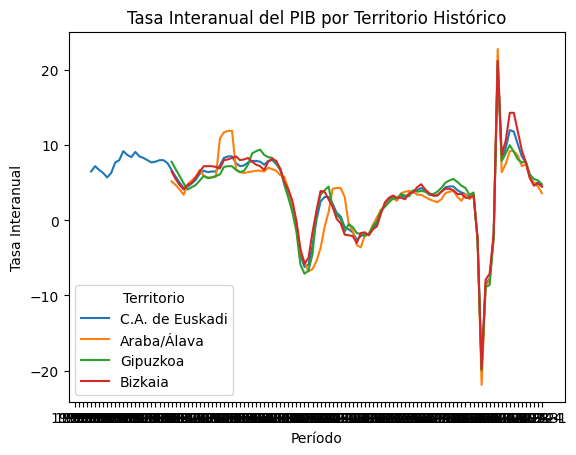

In [ ]:
for territorio in pib['territorio histórico'].unique():
    df_territorio = pib[pib['territorio histórico'] == territorio]
    plt.plot(df_territorio['periodo'], df_territorio['value'], label=territorio)

# Configurar el título y las etiquetas
plt.title('Tasa Interanual del PIB por Territorio Histórico')
plt.xlabel('Período')
plt.ylabel('Tasa Interanual')
plt.legend(title='Territorio')
plt.show()

## Guardar los datos
Finalmente guardamos los datos obtenidos en formato csv, o cualquier otro formato permitido.

In [ ]:
pib.to_csv('PIB_trimestral_TH.csv', index=False)